### Modelling share prices using Brownian motion based on the normal distribution

A geometric Brownian motion (GBM), also known as an exponential Brownian motion, is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion with drift. It is an important example of stochastic processes satisfying a stochastic differential equation (SDE); in particular, it is used in mathematical finance to model stock prices in the Black–Scholes model.

### Stochastical differential equation

A stochastic process $S_t$ is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$ d S_t = \mu S_t dt + \sigma S_t d W_t $

where $W_t$ is a Wiener process or Brownian motion, and $\mu$ ('the percentage drift') and $\sigma$ ('the percentage volatility') are constants.

The former parameter is used to model deterministic trends, while the latter parameter models unpredictable events occurring during the motion.


### Solution

For an arbitrary initial value $S_0$ the above SDE has the analytic solution (under Itô calculus | Itô's interpretation):

$S_t = S_0\exp\left( \left(\mu - \frac{\sigma^2}{2} \right)t + \sigma W_t\right).$

The derivation requires the use of Itô calculus. Applying Itô's formula leads to

 $d(\log S_t) =  (\log S_t)'  d S_t + \frac{1}{2} (\log S_t)'' \,dS_t \,dS_t
= \frac{d S_t}{S_t} -\frac{1}{2} \,\frac{1}{S_t^2} \, dS_t \, dS_t $

where $dS_t \, dS_t$ is the quadratic variation of the SDE. 

$ d S_t \, d S_t \, = \, \sigma^2 \, S_t^2 \, d W_t^2 + 2 \sigma S_t^2 \mu \, d W_t \, d t + \mu^2 S_t^2 \, d t^2 $

When $d t \to 0 $, $d t$ converges to 0 faster than $d W_t$, 
since $d W_t^2 = O(d t) $. So the above infinitesimal can be simplified by 

$ d S_t \, d S_t \, = \, \sigma^2 \, S_t^2 \, dt $

Plugging the value of $dS_t$ in the above equation and simplifying we obtain

$\log \frac{S_t}{S_0} = \left(\mu -\frac{\sigma^2}{2}\,\right) t + \sigma W_t\,.$

Taking the exponential and multiplying both sides by $S_0$ gives the solution claimed above.


### Estimation of $\mu$ and $\sigma$

From model,  we have

\begin{align*}
\log{S_t} &= \log{S_0} + (\mu - \frac{\sigma^2}{2}) t + \sigma W_t \\

\log{S_{t-1}} &= \log{S_0} + (\mu - \frac{\sigma^2}{2}) (t-1) + \sigma W_{t-1} \\

\log{S_t} - \log{S_{t-1}} &= (\mu - \frac{\sigma^2}{2}) + \sigma(W_t - W_{t-1}) 
\end{align*}

calculate expection and variance
\begin{align*}
    E[\log{S_t} - \log{S_{t-1}}] &= (\mu - \frac{\sigma^2}{2}) + \sigma E[W_t - W_{t-1}] \\
    &= (\mu - \frac{\sigma^2}{2}) + \sigma * 0 \\
    &= (\mu - \frac{\sigma^2}{2})
\end{align*}

\begin{align*}
Var[\log{S_t} - \log{S_{t-1}}] &= Var[(\mu - \frac{\sigma^2}{2}) + \sigma (W_t - W_{t-1})] \\
&= \sigma^2 Var[W_t - W_{t-1}] \\
&= \sigma^2 
\end{align*}

Then $ \log{S_t} - \log{S_{t-1}} \sim N(\mu - \frac{\sigma^2}{2}, \sigma) $.

If we have samples S, we can use $\log{S_t} - \log{S_{t-1}}$ for t=1, 2, 3, 4, ..., to estimate $\mu$ and $\sigma$.


Let's interpret $ \log{S_t} - \log{S_{t-1}}$.
\begin{align*}
\log{S_t} - \log{S_{t-1}} &= \log{(1 + ( \frac{S_t}{S_{t-1}} -1))} \\
&= \log({1 + \frac{S_t-S_{t-1}}{S_{t-1}}}) \\
&= 0 + \frac{S_t-S_{t-1}}{S_{t-1}} + o(\frac{S_t-S_{t-1}}{S_{t-1}}) \\
&\approx \frac{S_t-S_{t-1}}{S_{t-1}}
\end{align*}

take $S_t-S_{t-1}$ as earning, $S_{t-1}$ as an invest, then $\frac{S_t-S_{t-1}}{S_{t-1}}$ can be interpreted as relative return.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# drift coefficent
mu = 0.01
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 50
# initial stock price
S0 = 100
# volatility
sigma = 0.003

In [ ]:
# calc each time step
dt = T/n
# print(f"dt is {dt}")

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)
# print(St)

In [ ]:
# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

(101,)
(101, 50)


## Plotting Results

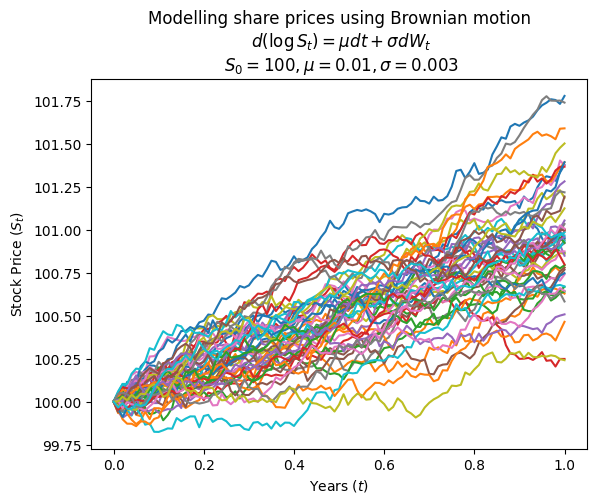

In [13]:
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Modelling share prices using Brownian motion\n $d (\log S_t) = \mu dt + \sigma dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()